In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('../data/final_per_90_and_pAdj.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 110 entries, fb_id to attacking_touches
dtypes: float64(101), int64(1), object(8)
memory usage: 606.0+ KB


In [3]:
def_stats = df.loc[df['Nineties']>1][[ 'Nineties','pAdj_Total_tackles', 'pAdj_Tackles_Won','Aerial_win_pct',
#                                       'pAdj_Tackles_Def_3rd',
#        'pAdj_Tackles_Mid_3rd', 'pAdj_Tackles_Att_3rd',
       'pAdj_Num_Dribblers_tackled', 'pAdj_Num_Dribbled_past',
       'pAdj_total_pressing', 'pAdj_Won_ball_5_sec',  'pAdj_Blocks',
       'pAdj_Interceptions', 'pAdj_Clearences',
#        'pAdj_Yellow_cards', 
       'pAdj_Fouls', 'pAdj_def_interceptions',
#         'pAdj_PK_conceded',
       'pAdj_Recoveries', 'pAdj_Aerial_Duels_lost',
       'True_tackle_pct', 'pAdj_Tackle_int_blocks']]

In [4]:
def_stats.iloc[:,0:4]

,Nineties,pAdj_Total_tackles,pAdj_Tackles_Won,Aerial_win_pct
0,25.4,0.668489,0.267396,17.4000
1,29.9,2.548363,1.052585,44.8000
2,26.5,3.624174,2.641347,28.6000
3,33.8,1.252244,0.834829,12.9000
4,26.5,3.185646,1.725558,23.3000
...,...,...,...,...
693,5.7,6.681674,4.251974,53.8000
694,1.6,3.008069,3.008069,57.1000
697,1.7,3.890483,2.917862,88.9000
698,1.2,0.000000,0.000000,45.3616


In [5]:
## unscaled defensive features do not show clear clusters

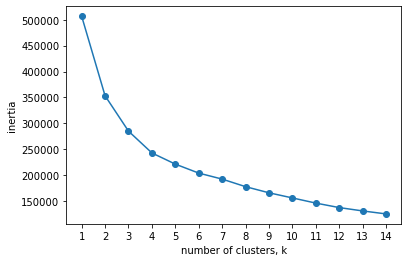

In [6]:


ks = range(1, 15)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(def_stats)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

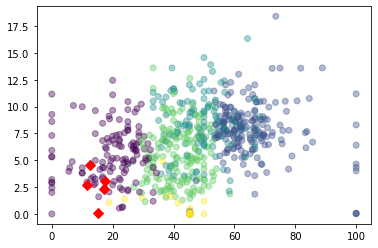

In [7]:
# Create a KMeans instance with 5 clusters: model
model = KMeans(n_clusters=5)

# Fit model to points
model.fit(def_stats)

# Determine the cluster labels of new_points: labels
labels = model.predict(def_stats)


# Assign the columns of new_points: xs and ys
xs = def_stats.iloc[:,3]
ys = def_stats.iloc[:,-1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys, c=labels,alpha=0.4)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]


# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',color='r',s=50)
plt.show()

In [8]:
# Create scaler: scaler
scaler = StandardScaler()
# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=5)



scaler.fit(def_stats)
scaled_stats= scaler.transform(def_stats)

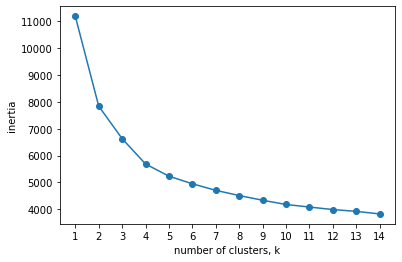

In [9]:

ks = range(1, 15)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(scaled_stats)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

5231.236575839501


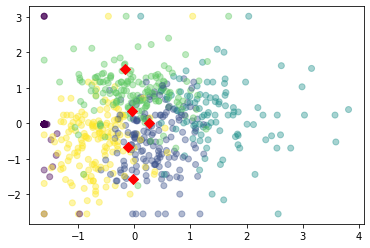

In [10]:

kmeans = KMeans(n_clusters=5)



scaler.fit(def_stats)
scaled_stats= scaler.transform(def_stats)
model = kmeans.fit(scaled_stats)
print(model.inertia_)
labels = model.predict(scaled_stats)
# Assign the columns of new_points: xs and ys
xs = scaled_stats[:,1]
ys = scaled_stats[:,3]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys, c=labels,alpha=0.4)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]


# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50,color='r')
plt.show()

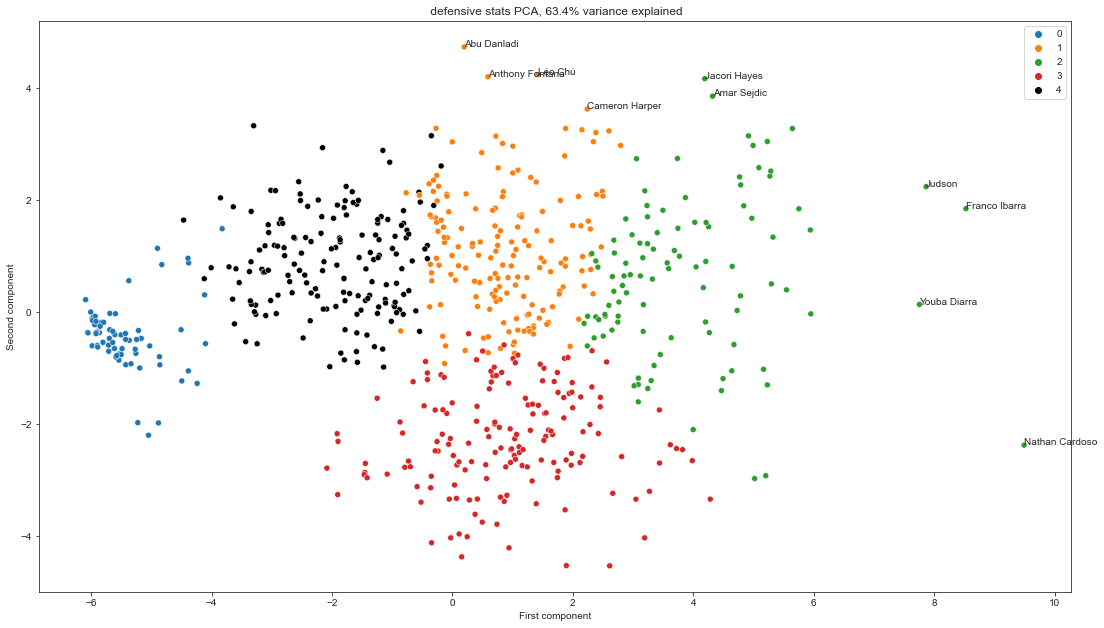

In [95]:
def_pca = PCA().fit(scaled_stats)
def_pca_x = def_pca.transform(scaled_stats)
def_pca_df = pd.DataFrame(def_pca_x[:,:2])
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
data = def_pca_x[:,0:2]
x = def_pca_x[:, 0]
y = def_pca_x[:, 1]
# p = names
c = labels


pc_var = 100 * def_pca.explained_variance_ratio_.cumsum()[1]
g = sns.scatterplot(data=def_pca_df, x =x, y=y,hue=c,palette=["C0", "C1", "C2","C3", "k"], ax=ax)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f' defensive stats PCA, {pc_var:.1f}% variance explained')
p=df.loc[df['Nineties']>1]['player_name']
for p, x, y in zip(p, x, y):
    if x >6:
        plt.annotate(p, (x, y))
    if y> 3.6:
        plt.annotate(p, (x,y))
plt.show()
plt.show()

In [12]:
## attacking stats below 


In [36]:
att_stats = df.loc[df['Nineties']>1][['Nineties', 'xA',
       'Key_pass', 'Comp_prog', 
        'Total_Prg_Dist', 'Short_Cmp', 'Short_Att',
       'Short_Cmp_pct', 'Medium_Cmp', 'Medium_Att', 'Medium_Cmp_pct',
       'Long_Cmp', 'Long_Att', 'Long_Cmp_pct', 'touches',
       'touches_mid_3rd',
       'touches_att_3rd', 'touches_att_box', 'dribble_Succ',
       'dribble_Att', 'dribble_Succ_pct', 'num_dribble_past',
       'dribble_megs', 'carries', 'carries_prog_dist',
       'carries_prog', 'carries_att_3rd', 'carries_att_box',
       'miss_control', 'dispossed', 'recep_targ', 'recep_succ',
       'recept_pct', 'Fouls_drawn', 'Offsides', 'Crosses', 'PK_won',
       'Aerial_win_pct', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90',
       'G/Sh', 'G/SoT', 'xG', 'npxG',
       'npxG/Sh', 'np:G-xG']]

In [37]:
scaler.fit(att_stats)
att_stats_scale = scaler.transform(att_stats)
att_scaled_df = pd.DataFrame(att_stats_scale, columns=att_stats.columns)
att_scaled_df.head(2)

,Nineties,xA,Key_pass,Comp_prog,Total_Prg_Dist,Short_Cmp,Short_Att,Short_Cmp_pct,Medium_Cmp,Medium_Att,...,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,xG,npxG,npxG/Sh,np:G-xG
0,1.129945,4.203749,5.860206,4.356283,1.390192,0.725110,0.804104,-0.213085,0.947684,1.233483,...,0.714527,0.459968,-0.228544,-0.149357,-0.248142,-0.27826,0.481886,0.377443,-0.337837,-0.446566
1,1.626350,3.499109,3.128308,1.444167,1.187466,0.087441,0.377812,-1.325162,0.201555,0.546044,...,-0.091880,-0.158355,-0.304560,-0.223241,-0.307875,-0.28504,-0.153942,-0.120996,-0.400948,-0.226228


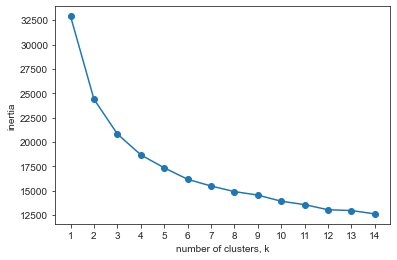

In [38]:

ks = range(1, 15)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(att_stats_scale)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

17354.43767067312


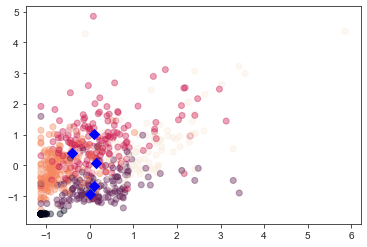

In [39]:

kmeans = KMeans(n_clusters=5)


scaler = StandardScaler()
scaler.fit(att_stats)
att_scaled_stats= scaler.transform(att_stats)
model = kmeans.fit(att_scaled_stats)
print(model.inertia_)
att_labels = model.predict(att_scaled_stats)
# Assign the columns of new_points: xs and ys
xs = att_scaled_stats[:,2]
ys = att_scaled_stats[:,3]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys, c=att_labels,alpha=0.4)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]


# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50,color='b')
plt.show()

In [40]:
print(att_scaled_stats.shape)

att_pca = PCA().fit(att_scaled_stats)
att_pca

(658, 50)


PCA()

In [41]:
att_scaled_df

,Nineties,xA,Key_pass,Comp_prog,Total_Prg_Dist,Short_Cmp,Short_Att,Short_Cmp_pct,Medium_Cmp,Medium_Att,...,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,xG,npxG,npxG/Sh,np:G-xG
0,1.129945,4.203749,5.860206,4.356283,1.390192,0.725110,0.804104,-0.213085,0.947684,1.233483,...,0.714527,0.459968,-0.228544,-0.149357,-0.248142,-0.278260,0.481886,0.377443,-0.337837,-0.446566
1,1.626350,3.499109,3.128308,1.444167,1.187466,0.087441,0.377812,-1.325162,0.201555,0.546044,...,-0.091880,-0.158355,-0.304560,-0.223241,-0.307875,-0.285040,-0.153942,-0.120996,-0.400948,-0.226228
2,1.251289,2.668263,3.423687,3.227416,0.590054,1.164650,1.434159,-0.754491,0.005826,0.412584,...,0.968862,-0.093531,-0.099498,-0.135131,-0.297867,-0.275446,0.498522,0.403033,-0.424801,-0.166739
3,2.056567,1.365868,2.285888,0.757760,0.050246,0.526875,0.443995,0.445383,0.223062,0.128697,...,0.885022,0.928697,-0.300389,-0.170770,-0.161614,-0.222875,0.694221,0.333397,-0.368534,0.759525
4,1.251289,2.998503,3.024283,2.632153,0.794318,1.331721,1.428035,-0.169187,0.076532,0.324391,...,0.968862,0.464955,-0.205471,-0.135131,-0.275863,-0.312103,0.640163,0.733110,-0.325747,-1.003357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,-1.043204,-0.964375,-1.119530,0.714563,0.446829,1.699511,1.553753,0.664872,1.654208,1.563549,...,-0.872311,-1.325190,-0.281850,-0.276544,-0.385881,-0.431236,-0.713708,-0.723057,-0.247548,-0.008477
654,-1.495484,-0.964375,-1.119530,-0.895808,0.019720,-1.042354,-0.939569,-1.222734,0.524226,0.368163,...,-0.872311,-1.325190,1.539964,-0.276544,-0.385881,-0.431236,-0.823459,-0.841101,0.132373,0.160634
655,-1.484453,-0.964375,-1.119530,0.024103,-0.730986,-0.287096,-0.169808,-0.739858,-0.477280,-0.031126,...,-0.872311,-1.325190,-0.438614,-0.276544,-0.385881,-0.431236,-0.823459,-0.841101,-0.523854,0.160634
656,-1.539609,-0.964375,-1.119530,1.597284,-0.822235,-0.894775,-0.567618,-2.481138,-1.367507,-1.149811,...,2.663274,1.168048,6.709797,5.753818,-0.385881,-0.431236,1.783125,1.962432,4.725958,-3.855741


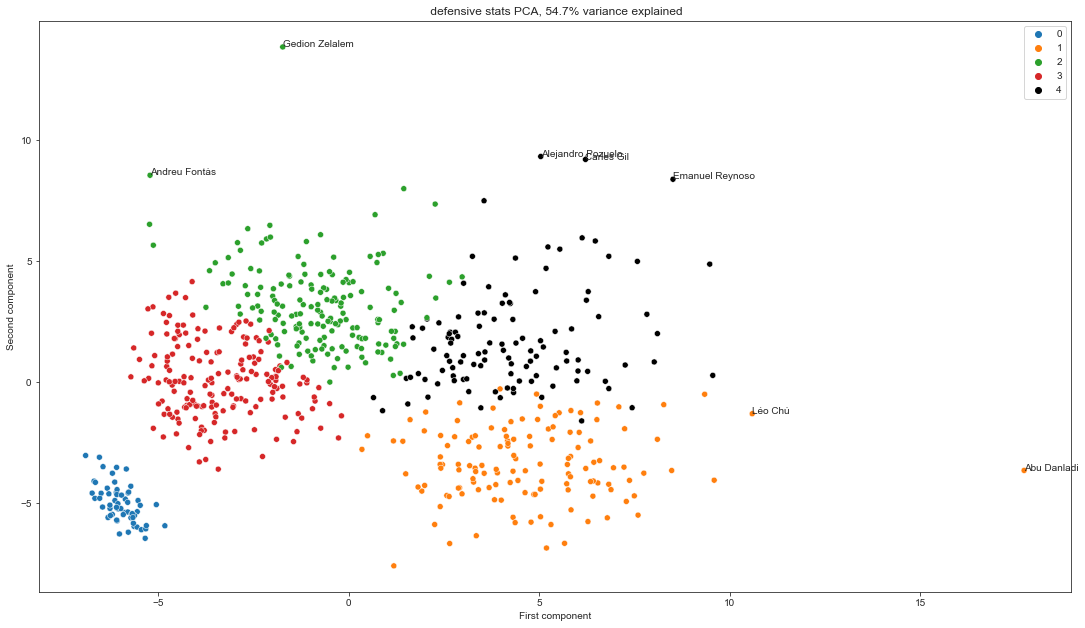

In [92]:

scaler = StandardScaler()
scaler.fit(att_stats)
att_scaled_stats= scaler.transform(att_stats)

att_pca = PCA().fit(att_scaled_stats)
att_pca_x = att_pca.transform(att_scaled_stats)
att_pca_df = pd.DataFrame(att_pca_x[:,:2])
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
data = att_pca_x[:,0:2]
x = att_pca_x[:, 0]
y = att_pca_x[:, 1]

c = att_labels


pc_var = 100 * att_pca.explained_variance_ratio_.cumsum()[1]
g = sns.scatterplot(data=att_pca_x[:,0:2], x =att_pca_x[:, 0], y=att_pca_x[:, 1],
                    hue=c,palette=["C0", "C1", "C2","C3", "k"],
                    ax=ax)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f' defensive stats PCA, {pc_var:.1f}% variance explained')
p=df.loc[df['Nineties']>1]['player_name']
for p, x, y in zip(p, x, y):
    if x >10:
        plt.annotate(p, (x, y))
    if y> 8:
        plt.annotate(p, (x,y))
plt.show()

## pca scatter of first two components show clear distribution of 4 distict clusters, cluster is the smallest ans includes all of the outliers. should label cluster 2 and see who it is 

## dbscan can help look for outliers that could give more insight into this data set. 

In [88]:
dfc = pd.DataFrame({'cluster_label':att_labels,'name':df.loc[df['Nineties']>1]['player_name'],
                    'Position':df.loc[df['Nineties']>1]['Position'],
                   'PCA_first_component':att_pca_x[:, 0],
                   'PCA_second_component':att_pca_x[:,1],'Ninties':df.loc[df['Nineties']>1]['Nineties']})

In [89]:
dfc.head()

,cluster_label,name,Position,PCA_first_component,PCA_second_component,Ninties
0,4,Carles Gil,MF,6.212599,9.197789,25.4
1,2,Julian Gressel,DF,1.194535,2.969456,29.9
2,4,Emanuel Reynoso,MF,8.507934,8.378214,26.5
3,4,Albert Rusnák,MF,1.667385,2.287143,33.8
4,4,Maximiliano Moralez,MF,3.245456,5.196554,26.5


In [90]:
dfc['cluster_label'].value_counts()

3    182
2    171
1    134
4    111
0     60
Name: cluster_label, dtype: int64

In [82]:
dfc.loc[dfc['Position']=='MF']['cluster_label'].value_counts()

4    90
2    88
1    59
3    52
Name: cluster_label, dtype: int64

In [62]:
## i did all the clustering on the entire data set not just the defenders.... 


## can try and cut it down tomorrow and see how that loos 

In [83]:
dfc.loc[dfc['Position']=='DF']['cluster_label'].value_counts()

3    128
2     81
4      2
Name: cluster_label, dtype: int64

In [84]:
dfc.loc[dfc['Position']=='GK']['cluster_label'].value_counts()

0    60
Name: cluster_label, dtype: int64

In [85]:
dfc.loc[dfc['Position']=='FW']['cluster_label'].value_counts()

1    75
4    19
2     2
3     2
Name: cluster_label, dtype: int64

In [ ]:
 can relabel players who are outliers to their postion ? , defenders almost all in 3 and 2 , gk all in one,
    fw almost all in 1 and not in 2 and 3 which is the opposite of the df column which points towards the
    cluters picking up position to some extent. 
    
    could try less clusters and see if labels even more clean. 

In [91]:
dfc.loc[(dfc['Position']=='FW')&(dfc['cluster_label'] ==2)]

,cluster_label,name,Position,PCA_first_component,PCA_second_component,Ninties
325,2,Joe Gyau,FW,0.272076,1.849851,18.5
515,2,Jahkeele Marshall-Rutty,FW,2.051842,2.664905,4.7
